# Laboratory Exercise. Estimation.

    Jesús Cid Sueiro, Jerónimo Arenas García
    
    Version 1.0 (Nov. 2018)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

Company *Like2Call* offers hosting services for call centers. In order to better dimension the staff of operator, the company has collected a lot of data about the activity of the service during 5 consecutive labour days.

In particular, they have stored an array `t` containing the ordered timestamps of all calls received during this period, in hours. This variable can be found in file `dataset.npy`

In [11]:
# <SOL>
# ###############
# Data generation
# ###############

# #######################
# Generate starting times

# Generate s using the known prior
np.random.seed(0)
n_calls = 2000    # Total no. of calls in the whole period
H = 24            # Total no. of hours in a day.
n_days = 5

# Day of each call, uniformly at randomm between 0 and n_days-1
day = np.random.randint(0, high=n_days, size=n_calls)

# Hours uniformly at random
t_d_0 = np.random.uniform(0, H, size=n_calls)
# Hours from a beta distribution
t_d_1 = H * np.random.beta(9, 4, size=n_calls)
# Hours from a mixture of uniform and beta distributions
b = np.random.binomial(1, 0.1, size=n_calls)

t = day * H + b * t_d_0 + (1-b) * t_d_1
t = np.sort(t)

np.save('dataset.npy', t)
# </SOL>

t = np.load('dataset.npy')

### 1. Time between calls

 * [1.1] Plot the histogram of the timestamps

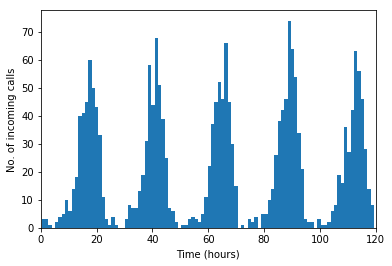

In [12]:
# Histograms of call times
# <SOL>
plt.hist(t, bins=100)
plt.xlabel('Time (hours)')
plt.ylabel('No. of incoming calls')
plt.xlim([0, n_days*H])
plt.show()
# </SOL>


 * [1.2] Generate an array `x_all` containing the succesive time beween calls, and plot the corresponding histogram.

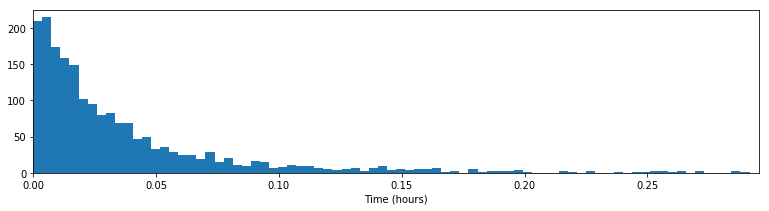

In [13]:
# <SOL>
x_all = np.diff(t)
plt.figure(figsize=(13,3))
plt.hist(x_all, bins=800)
plt.xlim([0, max(x_all)/10])
plt.xlabel('Time (hours)')
plt.show()
# </SOL>

### 2. Parameter estimation.

The company has decided to build a statistical model to characterize the activity in the hosted call centers. By looking at the histogram, it seems that the time between incoming calls may follow an exponential distribution

$$
p_{X|S}(x|s) = s \exp(−s x), \qquad x > 0
$$

where random variable $X$ represents the time before a new call arrives, and $S$ is the parameter of such distribution. Thus, we will use the dataset to estimate parameter $s$.

#### 2.1. Maximum likelihood

 * [2.1]. Obtain the maximum likelihood estimator or $S$ based on the observations in `x_all`, and save it in variable `sML`. You will need to compute two variables that will be used several times along this section:
     - $K$: The number of observations in `x_all`
     - $z = \sum_{k=0}^{K-1} x^{(k)}$, where $x^{(k)}$ are the components of `x_all`.

In [17]:
# z = <FILL IN>
z = np.sum(x_all)
# K = <FILL IN>
K = len(x_all)
# sML = <FILL IN>
sML = K / z

display(Math(r'\hat{s}_\text{ML} = ' + str(sML)))

<IPython.core.display.Math object>

 * [2.2]. Plot the log of the likelihood as a function of $s$ (in the appropriate range of $s$) and verify that the ML estimate reaches the maximum.

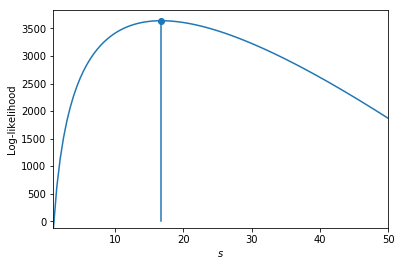

In [15]:
# <SOL>
s = np.linspace(1, 50, 101)

def Lp(s, z, K):
    return K*np.log(s) - s*z

Lmax = Lp(sML, z, K)
Ls = Lp(s, z, K)

plt.plot(s, Ls)
plt.stem([sML], [Lmax])
plt.xlim((s[0], s[-1]))
plt.ylim([np.min(Ls), plt.ylim()[1]])
plt.xlabel('$s$')
plt.ylabel('Log-likelihood')
plt.show()
# </SOL>

#### 2.2. Bayesian estimation

In order to apply Bayesian estimation methods, parameter $S$ is taken as a random variable with the following a priori model:

$$
p_S(s) = \exp(−s), \qquad s > 0.
$$

* [2.3.] Obtain the maximum a posteriori estimator of $S$ given $X$, and save it in variable `sMAP`.

In [16]:
# sMAP = <FILL IN>
sMAP = K / (z + 1)

display(Math(r'\hat{s}_\text{MAP} = ' + str(sMAP)))

<IPython.core.display.Math object>

 * [2.4]. Show, in the same plot, the prior and the posterior probability density functions of parameter $S$, as a function of $s$ (in the appropriate range of $s$) and verify that the MAP estimate reaches the maximum of the posterior.

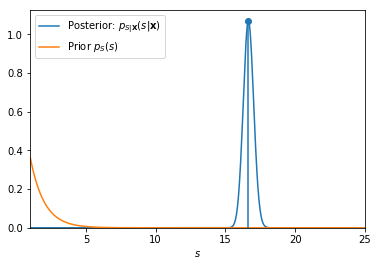

In [8]:
# <SOL>
def PP(s, z, K):
    logPP = K*np.log(s) + (K+1)*np.log(z+1) - s*(z+1) - np.sum(np.log(range(1, K+1)))
    return np.exp(logPP)

s = np.linspace(1, 25, 1000)
plt.plot(s, PP(s, z, K), label='Posterior: $p_{S|\mathbf{X}}(s|\mathbf{x})$')
plt.plot(s, np.exp(-s), label='Prior $p_{S}(s)$')
plt.stem([sMAP], [PP(sMAP, z, K)])
plt.xlim((s[0], s[-1]))
plt.ylim((0, plt.ylim()[1]))
plt.xlabel('$s$')
plt.legend(loc='upper left')
plt.show()
# </SOL>

The prior distribution describes the initial belief about $S$. The figure should show that, for the given prior, the true value of $S$ can be expected to be between 0 and 5. However, the data modifies our knowledge about $S$. After observing the data, we can expect that the true value of $S$ will be somewhere between 15 and 18.

 * [2.5.] Obtain the minimum mean square error estimator of $S$ given $\mathbf{X}$ (i.e. given the data in `x_all`) and save it in variable `sMSE`.

In [18]:
# sMSE = <FILL IN>
sMSE = (K + 1) / (z + 1)

display(Math(r'\hat{s}_\text{MSE} = ' + str(sMSE)))

<IPython.core.display.Math object>

 * [2.6.] Note the MAP and the MSE estimates are very similar because the posterior distribution is approximately (although not exactly) symmetric. Also, the MSE estimate is only slightly different from the ML estimate, because we have a large dataset and the influence of the prior distribution decreases when we have much empirical evidence.
 
   However, the Bayesian approach provides not only an estimate but a posterior distribution, that describes how much we know about the true value of parameter $S$ after the data observation. The variance of this distribution describes how far the true value of $S$ could be from the posterior mean.
   
   (Incidentally, note that, since $\hat{s}_\text{MSE}$ is the posterior mean, the conditional MSE, which is given by,

   $$
   \mathbb{E}\left\{(S-\hat{s}_\text{MSE})^2| {\bf z}\right\}
   $$

   is equal to the variance of the posterior distribution).
   
   Compute the Minimum MSE for the given data, and save it in variable `mMSE`

In [19]:
print("The minimum MSE is given by ")
# mMSE = <FILL IN>
mMSE = (K+1)/(z+1)**2

display(Math(r'\text{MSE} = \frac{K+1}{(z +1)^2} = ' + str(mMSE) ))

The minimum MSE is given by 


<IPython.core.display.Math object>

 * [2.7.] [**OPTIONAL**] Compute the probability that the true parameter was not further than two standard deviations from the posterior mean, that is

   $$
   P\left\{\hat{s}_\text{MSE} - 2 \sqrt{v_\text{MSE}} \le S \le
           \hat{s}_\text{MSE} + 2 \sqrt{v_\text{MSE}}\right\} 
   $$
   Save it in variable `p`

In [21]:
from scipy.stats import gamma
# <SOL>
sc = 1/(z+1)
u = sMSE + 2*np.sqrt(mMSE)
d = sMSE - 2*np.sqrt(mMSE)
p = 1 - gamma.cdf(u, K+1, scale=sc) - gamma.cdf(d, K+1, scale=sc)

# </SOL>

display(Math(r'P\left\{\hat{s}_\text{MSE} - 2 \sqrt{v_\text{MSE}} \le S \le ' +
             r'\hat{s}_\text{MSE} + 2 \sqrt{v_\text{MSE}}\right\} = ' + str(p) ))

<IPython.core.display.Math object>

### 3. An improved data model.

#### 3.1. Temporal dynamics

The analysis in Section 2 is grounded on the assumption that the time between incoming calls follows an exponential distribution. The histogram obtained in exercise [1.2] provides some experimental evidence in support of this assumption. 

However, the histogram computed in exercise [1.1.] also shows that the activity of the call center varies with the time of the day. Therefore, we can expect that the time between calls also depends on the time of the day.

* [3.1] Plot the time between calls, as a function of time.

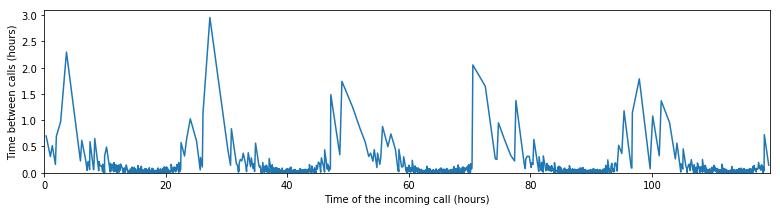

In [22]:
# <SOL>
plt.figure(figsize=(13,3))
plt.plot(t[:-1], x_all)  
plt.xlim([0, np.max(t)])
plt.ylim([0, 1.05*np.max(x_all)])
plt.xlabel('Time of the incoming call (hours)')
plt.ylabel('Time between calls (hours)')
plt.show()
# </SOL>


#### 3.1. Hour-dependent model

According to this, we can make a different model for each time of the day. To do so, we will keep the asumption that the time between incoming calls follows an exponential distribution

$$
p_{X|S,}(x \mid s) = s \exp(−s x), \qquad x > 0
$$

but, now, we will assume that parameter $s$ can take a different value from hour to hour. Therefore, we must estimate a different parameter $S$ for every hour.

To do so, we will need to split the data in 24 groups, one per hour, and compute specific variables $z$ and $K$ for each group.

 * [3.2] Split the dataset in 24 groups, assigning the data to each group depending on the hour of the starting time. Then, compute parameters $z$ and $K$ for each group, storing them in numpy arrays `z24` and `K24`.

In [23]:
# <SOL>
z24 = np.zeros(24)
K24 = np.zeros(24).astype(int)

h = np.fix(t) % 24
hx = list(zip(h, x_all))

for h in range(24):
    x24 = np.array([u[1] for u in hx if u[0] == h])
    z24[h] = np.sum(x24)
    K24[h] = x24.shape[0]
# </SOL>

# Check if your variables are ok.
# (Note that his is not a full test. Passing it does not 
# guarantee that variables have been correctly computed)
if np.sum(K24) == len(x_all):
    print("Test for variable K passed.")
else:
    print("Error in variable K.")
if np.sum(z24) == np.sum(x_all):
    print("Test for variable z passed.")
else:
    print("Error in variable z.")

Test for variable K passed.
Test for variable z passed.


 * [3.3] Compute the ML and the MSE estimates for each hour. Store them in vectors `sML24` and `sMSE24` and plot them as a function of the hour in the day.

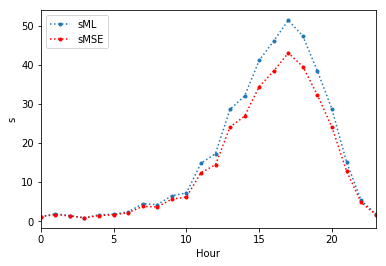

In [241]:
# <SOL>
sML24 = K24 / z24
sMSE24 = (K24+1) / (z24+1)

plt.plot(sML24, ':.', label='sML')
plt.plot(sMSE24, ':.', c='red', label='sMSE')
plt.xlabel('Hour')
plt.ylabel('s')
plt.xlim(0, 23)
plt.legend(loc='upper left')
plt.show()
# </SOL>

* [3.4] One may wonder if spliting the data in segments provides a better model for the time between calls. The joint data likelihood is a useful way to get a first quantitative evaluation of the new model.

    Compute the maximum log-likelihood for the joint model, and save it in variable `L24max`. Compare the result with the value of `Lmax` computed in [2.2].
    
    To compute the maximum log-likelihood of the joint model, take into account that the observations are independent, so that `L24max` is the sum of the values of the maximum log-likelihood computed for every hour.


In [203]:
# <SOL>
# Maximum log-likelihood per each hour
Lp24 = [Lp(sML24[h], z24[h], K24[h]) for h in range(24)]
# Overall maximum likelihood
Lmax24 = np.sum(Lp24)
# </SOL>

print('Maximum log-likelihood of the simple model: {}'.format(Lmax))
print('Maximum log-likelihood of the hour-dependent model: {}'.format(Lmax24))

Maximum log-likelihood of the simple model: 3639.8319677147865
Maximum log-likelihood of the hour-dependent model: 4693.196860625254


 #### 3.3. Posterior distributions

 * [3.5] Plot the posterior probabilities for each hour slot

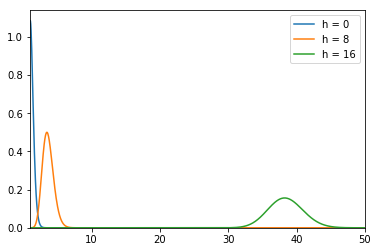

In [242]:
# <SOL>
s = np.linspace(1, 50, 1000)

plt.figure()
for h in [0, 8, 16]:
    plt.plot(s, PP(s, z24[h], K24[h]), label='h = {}'.format(h))

plt.xlim((s[0], s[-1]))
plt.ylim((0, plt.ylim()[1]))
plt.legend()
plt.show()
# </SOL>

You should observe that, as expected, each posterior distribution is centered around its respective estimate $\hat{s}_\text{MSE}$, (i.e. around `sMSE24[0]`, `sMSE24[8]` and `sMSE24[16]`.

In [243]:
print('sMSE24[0] = {}'.format(sMSE24[0]))
print('sMSE24[8] = {}'.format(sMSE24[8]))
print('sMSE24[16] = {}'.format(sMSE24[16]))

sMSE24[0] = 1.1557957932427152
sMSE24[8] = 3.6411230886136594
sMSE24[16] = 38.42034943006026


However, you can visually verify that the posterior distributions for $h=0$ and $h=8$ have less variance than that for $h=16$, why? This is because the prior distribution is in agreement with the data for $h=0$ and $h=8$ (in borth cases, $\hat{s}_\text{MSE}$ is smaller thatn 5). The larger variance for $h=16$ is a consequence of the higher uncertainty about $s$ created by the discrepancy between the prior and the observations.

In any case, for any value of $h$, more data is always better than less data. We can observe that, for any value of $h$, the variance of the posterior distribution tends to decrease when more data are used.

 * [3.6] Take $h$=16. For $d=1,...,5$, compute the variance of the posterior distribution of $s$ given only the data at hour $h$ up to day $d$. Plot the minimum MSE as a function of $d$

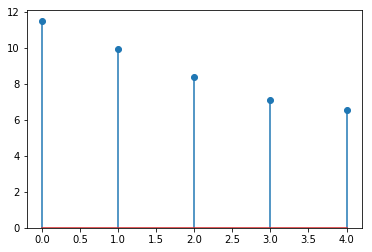

In [244]:
# <SOL>
tx = list(zip(t, x_all))
h0 = 16

z5 = np.zeros(n_days)
K5 = np.zeros(n_days).astype(int)

for d in range(5):
    x5 = np.array([u[1] for u in tx if u[0] < 24*(d+1) and np.fix(u[0]) % 24 == h0])
    z5[d] = np.sum(x5)
    K5[d] = x5.shape[0]

mmse5 = (K5+1)/(z5+1)**2

plt.figure()
plt.stem(mmse5)
plt.ylim(0, plt.ylim()[1])
plt.show()    
# </SOL>


 * [3.7] [**OPTIONAL**] Show, in the same plot, the posterior distribution of parameter $s$ given only the data at hour $h$ and for all days up to $d$, for $d=1,\ldots, 5$

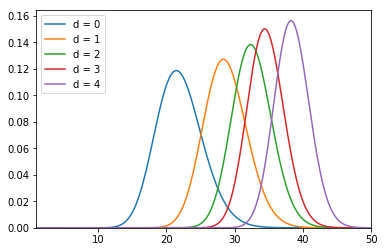

In [245]:
# <SOL>
tx = list(zip(t, x_all))
h0 = 16

plt.figure()
for d in range(n_days):
    plt.plot(s, PP(s, z5[d], K5[d]), label='d = {}'.format(d))

plt.xlim((s[0], s[-1]))
plt.ylim((0, plt.ylim()[1]))
plt.legend()
plt.show()    
# </SOL>
